# Zadanie VII

In [ ]:
conda install pandas

In [ ]:
conda install scipy

In [ ]:
conda install matplotlib

In [ ]:
conda install scikit-learn

In [2]:
import pandas as pd

In [41]:
import numpy as np

In [58]:
from scipy.cluster import hierarchy

In [91]:
import matplotlib.pyplot as plt

### Zadanie

In [3]:
data = pd.read_csv('https://www.fizyka.umk.pl/~grochu/wdm/files/zoo_nc.csv', names=range(17))

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
1,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
2,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
3,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
4,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
98,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
99,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
100,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
data.isnull().values.any()

False

In [17]:
data_train = data.iloc[1:,1:17]

In [46]:
data_train = data_train.astype(np.float)

In [47]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 1 to 101
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       101 non-null    float64
 1   2       101 non-null    float64
 2   3       101 non-null    float64
 3   4       101 non-null    float64
 4   5       101 non-null    float64
 5   6       101 non-null    float64
 6   7       101 non-null    float64
 7   8       101 non-null    float64
 8   9       101 non-null    float64
 9   10      101 non-null    float64
 10  11      101 non-null    float64
 11  12      101 non-null    float64
 12  13      101 non-null    float64
 13  14      101 non-null    float64
 14  15      101 non-null    float64
 15  16      101 non-null    float64
dtypes: float64(16)
memory usage: 12.8 KB


In [48]:
normalized_column = data_train[13]

In [54]:
data_train[13] = normalized_column.div(8)

In [55]:
data_train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
98,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
99,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [84]:
labels = data.iloc[1:,0:1]

In [85]:
labels = list(labels[0])

### Grupowanie hierarchiczne metodą połączeń średnich

In [69]:
Z = hierarchy.linkage(data_train, 'average')

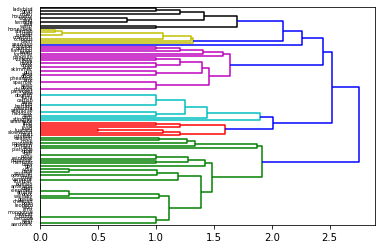

In [89]:
dn = hierarchy.dendrogram(Z, labels=labels, orientation='right')

In [90]:
row_clusters = hierarchy.linkage(data_train, method='average', metric='euclidean')

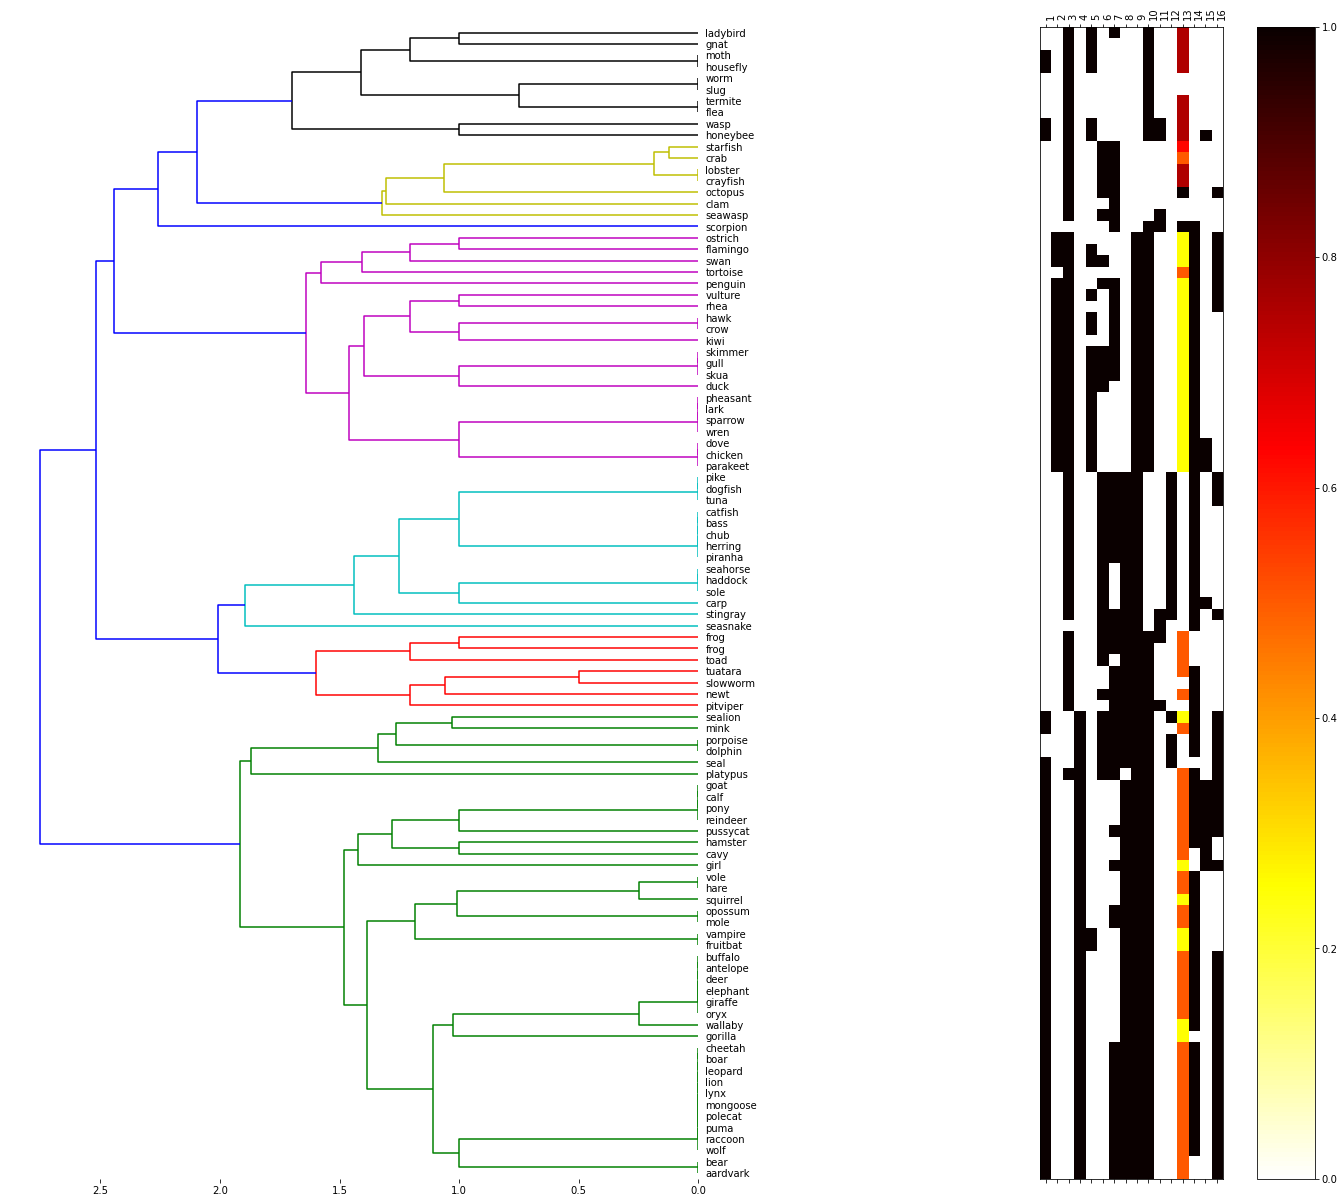

In [203]:
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.05, 0.5, 1.2, 2])

row_dendr = hierarchy.dendrogram(row_clusters, labels=labels, orientation='left', leaf_font_size=10)

df_rowclust = data_train.iloc[row_dendr['leaves'][::-1]]

for i in axd.spines.values():
    i.set_visible(False)
    
axm = fig.add_axes([1.2, 0.5, 1.2, 2])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

names = list(data_train.columns)
axm.set_xticks(np.arange(len(names)))
axm.set_yticks([])

axm.set_xticklabels(labels=names, rotation=90, ha='left')
fig.colorbar(cax)

plt.show()

In [234]:
count = {'green': 1,'red': 1,'cyan': 1,'magenta': 1,'yellow': 1,'black': 1, 'blue': 1}
count

{'green': 1,
 'red': 1,
 'cyan': 1,
 'magenta': 1,
 'yellow': 1,
 'black': 1,
 'blue': 1}

Trzeba zacząć od 1, ponieważ jeśli zaczniemy od 1, to każdy kolor ma wartość o 1 za małą

## Ilość w każdym klastrze:

In [235]:
for i in row_dendr['color_list']:
    if(i=='g'): count['green'] = count['green'] + 1
    elif(i=='r'): count['red'] = count['red'] + 1
    elif(i=='c'): count['cyan'] = count['cyan'] + 1
    elif(i=='m'): count['magenta'] = count['magenta'] + 1
    elif(i=='y'): count['yellow'] = count['yellow'] + 1
    elif(i=='k'): count['black'] = count['black'] + 1
    elif(i=='b'): count['blue'] = count['blue'] + 1

In [236]:
count

{'green': 41,
 'red': 7,
 'cyan': 14,
 'magenta': 21,
 'yellow': 7,
 'black': 10,
 'blue': 7}

Próba podziału za pomocą pakietu scikit-learn
Dane podzielone zostaną na 7 klastrów - tyle ile jest różnych kolorów widocznych na powyższym wykresie

In [155]:
from sklearn.cluster import AgglomerativeClustering

In [180]:
ac = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')

y = ac.fit_predict(data_train)

l=np.array(labels)
for g in np.unique(y):
    print('Grupa %d: %s' % (g, str(l[y==g])))

Grupa 0: ['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']
Grupa 1: ['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse' 'seasnake' 'sole' 'stingray' 'tuna']
Grupa 2: ['flea' 'gnat' 'honeybee' 'housefly' 'ladybird' 'moth' 'slug' 'termite'
 'wasp' 'worm']
Grupa 3: ['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'tortoise' 'vulture' 'wren']
Grupa 4: ['scorpion']
Grupa 5: ['clam' 'crab' 'crayfish' 'lobster' 'octopus' 'seawasp' 'starfish']
Grupa 6: ['frog' 'frog' 'newt' 'pitviper' 'slowworm' 'toad' 'tuatara']
